In [50]:
import numpy as np

In [51]:
D=np.random.randn(1000,500)

In [52]:
D

array([[ 1.09345965,  0.71515719, -0.55850423, ...,  0.74146901,
         1.18350723, -0.66016235],
       [ 1.98614558,  0.45316001, -1.09081697, ...,  0.46135328,
        -0.40709163,  1.61135884],
       [-0.75947223, -1.31913812, -1.19694796, ...,  0.38124694,
         0.25008281,  0.38911698],
       ...,
       [ 0.4947843 , -0.13258838,  1.05166556, ...,  0.41881329,
         0.01081266, -2.52244865],
       [-1.53398955, -0.75151729,  2.08223338, ..., -1.40762113,
        -2.97891753,  1.75690692],
       [ 1.07049658,  0.74862411,  0.08505672, ...,  0.0504498 ,
         0.56903187,  0.11347237]])

In [53]:
D.max

<function max>

In [54]:
D.max()

5.20355218186281

In [55]:
D.min()

-4.6217873459232806

In [56]:
D.mean()

0.0019479858492530626

In [57]:
D.std()

0.9998975163127927

D is a Gaussian distribution

In [58]:
Hidden_layer_sizes=[500]*10

In [59]:
Hidden_layer_sizes

[500, 500, 500, 500, 500, 500, 500, 500, 500, 500]

In [60]:
a=[500]

In [61]:
a

[500]

In [62]:
b=np.array([500])

In [63]:
b

array([500])

In [64]:
b*10

array([5000])

In [81]:
nonlinears=['relu']*len(Hidden_layer_sizes)

In [82]:
nonlinears

['relu',
 'relu',
 'relu',
 'relu',
 'relu',
 'relu',
 'relu',
 'relu',
 'relu',
 'relu']

In [89]:
act={'relu':lambda x:np.maximum(0,x), 'tanh':lambda x:np.tanh(x)}

In [90]:
act

{'relu': <function __main__.<lambda>>, 'tanh': <function __main__.<lambda>>}

In [91]:
Hs={}

In [92]:
import math
for i in xrange(len(Hidden_layer_sizes)):
    X=D if i==0 else Hs[i-1]
    fan_in=X.shape[1]
    fan_out=Hidden_layer_sizes[i]
    W=np.random.randn(fan_in,fan_out)/math.sqrt(fan_in)
    H=np.dot(X,W)
    #print H[:10]
    H=act[nonlinears[i]](H)
    #print(act[nonlinears[i]](H))
    Hs[i]=H
    print Hs[i][:10]

[[0.3064957  0.90554875 0.40769671 ... 0.         0.28951837 1.43938198]
 [0.         0.28550787 0.07626167 ... 0.         0.60601845 0.8397528 ]
 [1.43417772 0.25074194 1.11892809 ... 0.         1.97404624 0.76941926]
 ...
 [0.49753815 0.30497614 0.9351975  ... 1.28255203 0.         0.13960994]
 [0.         1.4104925  0.47350841 ... 0.86046546 1.30135835 0.        ]
 [0.26950829 1.61006443 0.         ... 1.32318096 1.8005564  0.        ]]
[[0.         0.         0.38382514 ... 0.         1.01480219 0.00567617]
 [0.         0.         0.         ... 0.         0.         0.2969825 ]
 [0.         0.         0.         ... 0.         0.52389656 0.        ]
 ...
 [0.         0.55651934 0.         ... 0.54954546 0.66553727 0.96198157]
 [0.36753999 0.18117686 0.54338945 ... 0.3156696  1.49187177 0.        ]
 [0.         0.         0.39430441 ... 0.33770095 0.90814836 0.35810379]]
[[0.         0.         0.         ... 0.         0.         0.24988436]
 [0.15122456 0.         0.06429126 ... 

In [93]:
print("input layer mean %f and std %f" %(np.mean(D), np.std(D)))

input layer mean 0.001948 and std 0.999898


In [94]:
layer_means=[np.mean(H) for i,H in Hs.items()]
layer_stds=[np.std(H) for i, H in Hs.items()]

In [95]:
for i,H in Hs.items():
    print('Hidden layer %d had mean %f and std %f' %(i+1,layer_means[i],layer_stds[i]))

Hidden layer 1 had mean 0.398389 and std 0.583268
Hidden layer 2 had mean 0.285865 and std 0.415999
Hidden layer 3 had mean 0.215486 and std 0.296401
Hidden layer 4 had mean 0.134133 and std 0.209728
Hidden layer 5 had mean 0.098119 and std 0.143140
Hidden layer 6 had mean 0.066536 and std 0.100661
Hidden layer 7 had mean 0.045825 and std 0.067274
Hidden layer 8 had mean 0.032170 and std 0.046282
Hidden layer 9 had mean 0.023319 and std 0.033360
Hidden layer 10 had mean 0.015628 and std 0.022737


In [96]:
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()

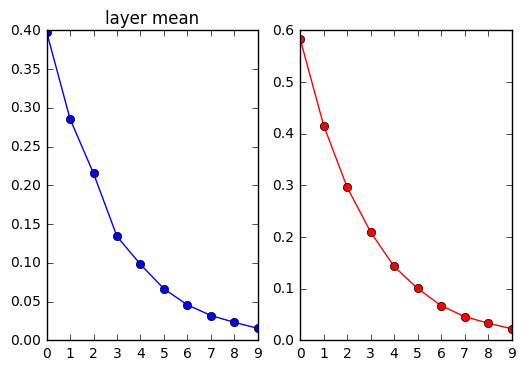

In [97]:
plt.subplot(121)
plt.plot(Hs.keys(),layer_means,'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(),layer_stds,'or-')

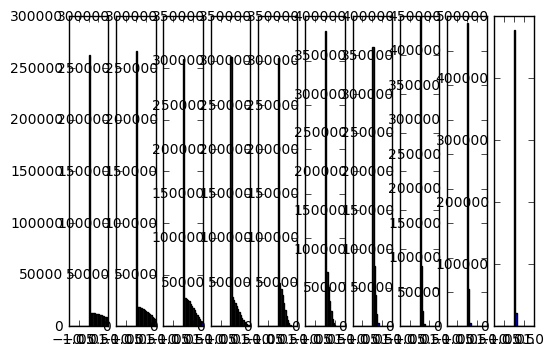

In [98]:
plt.figure()
for i,H in Hs.items():
    plt.subplot(1,len(Hs),i+1)
    plt.hist(H.ravel(),30,range=(-1,1))